In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#information about the dataset
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#describing about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

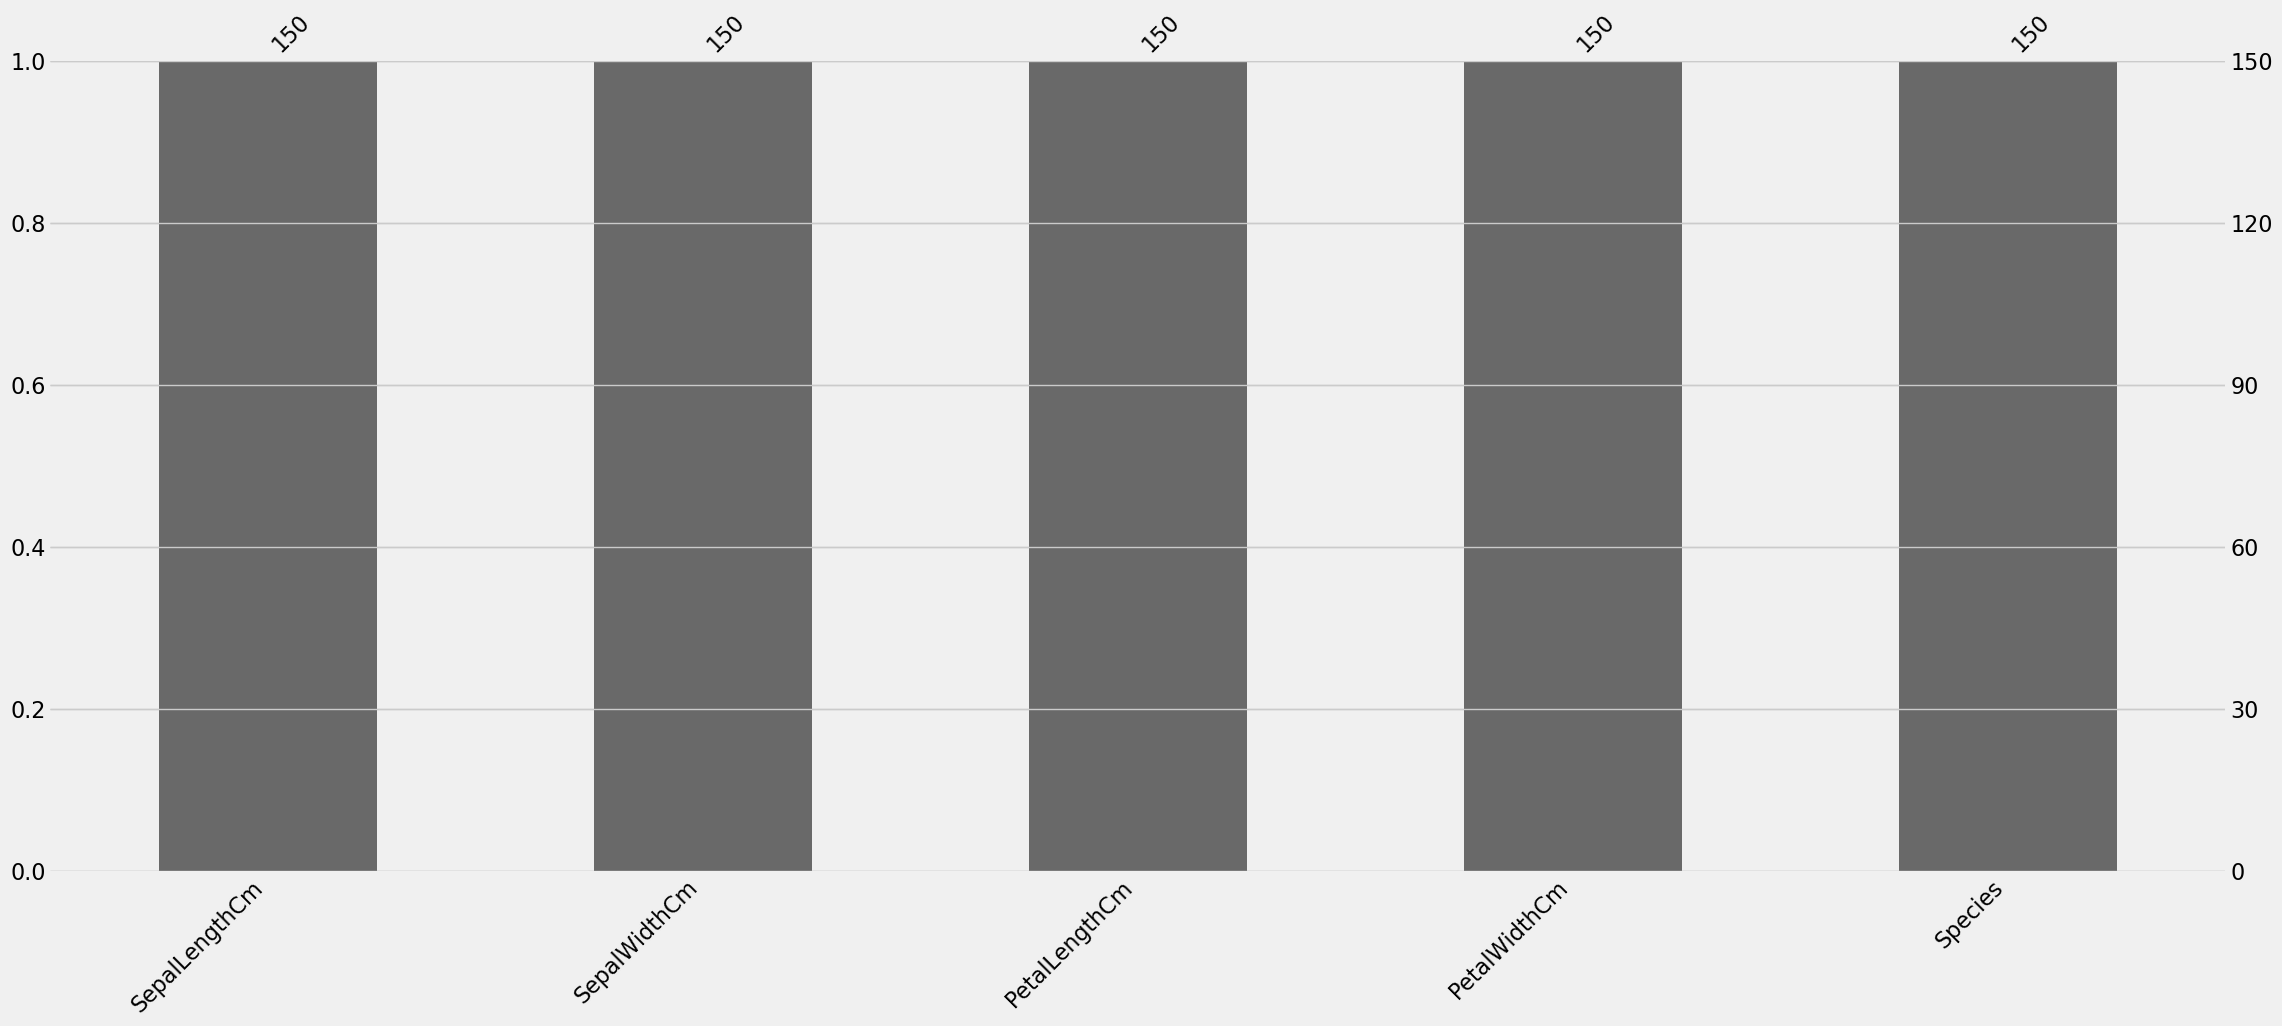

In [10]:
import missingno as msno
msno.bar(df)

In [11]:
df.drop_duplicates(inplace=True)

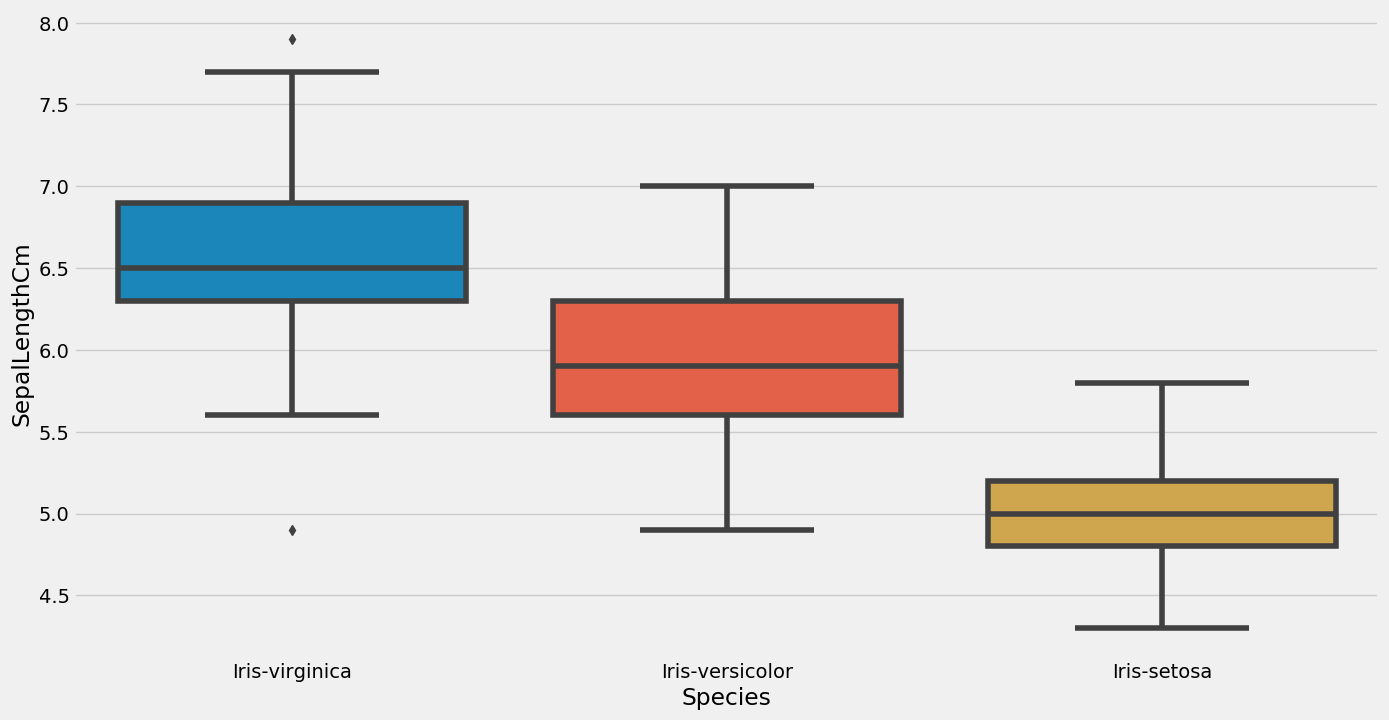

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

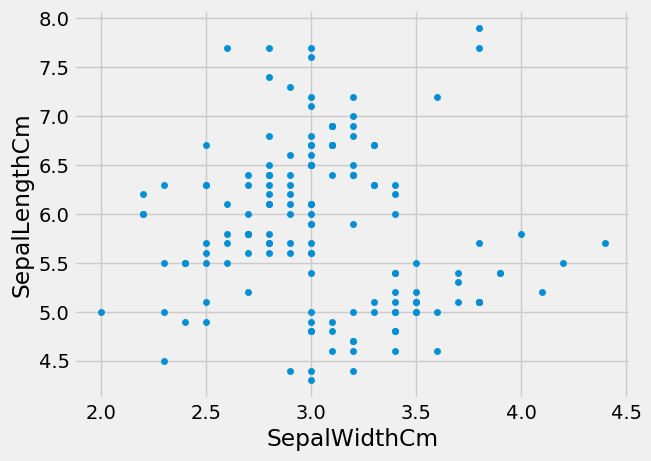

In [13]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

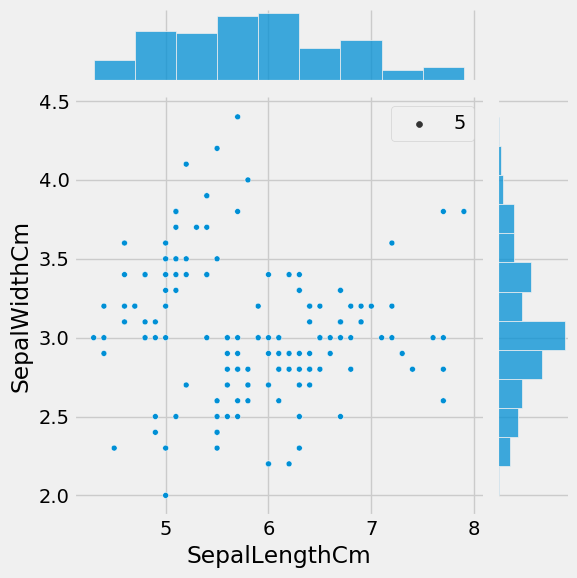

In [14]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

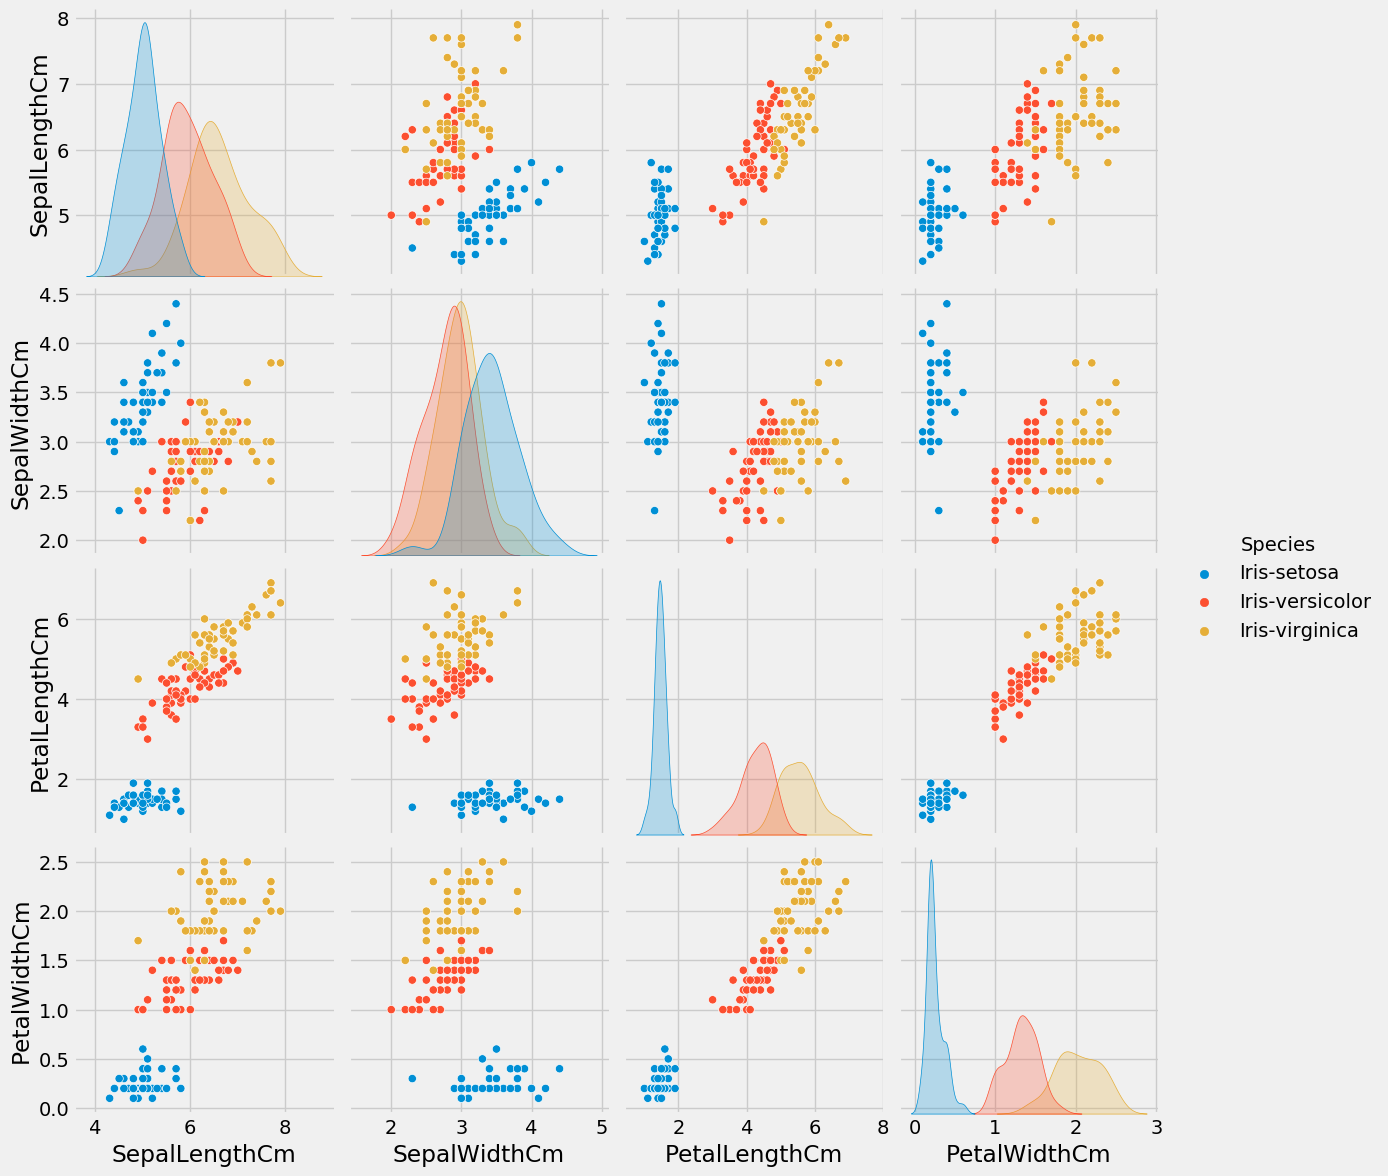

In [15]:
sns.pairplot(df, hue="Species", size=3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE6D369B38>,
      dtype=object)

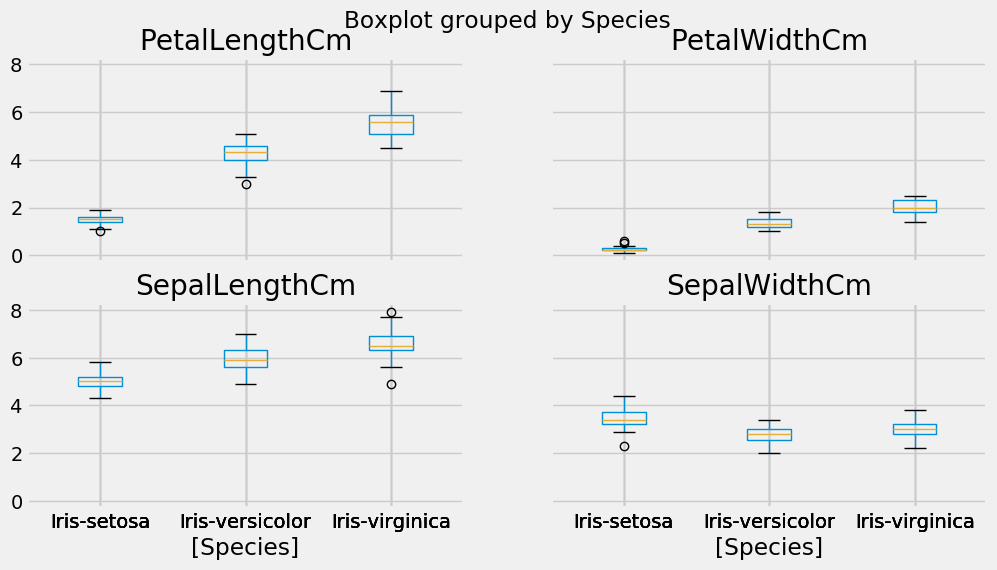

In [16]:
df.boxplot(by="Species", figsize=(12, 6))

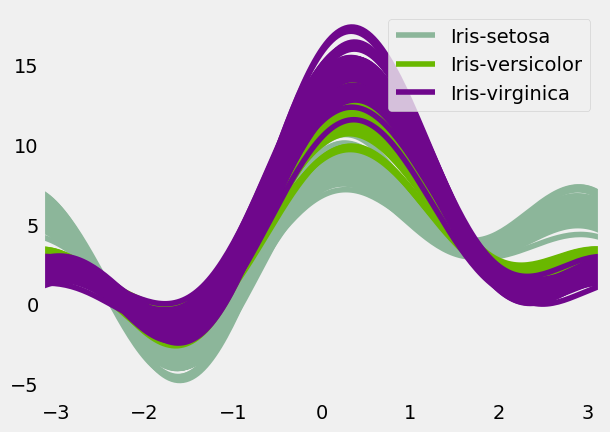

In [17]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

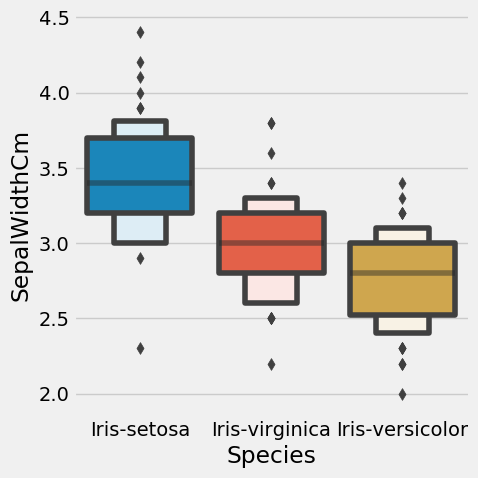

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

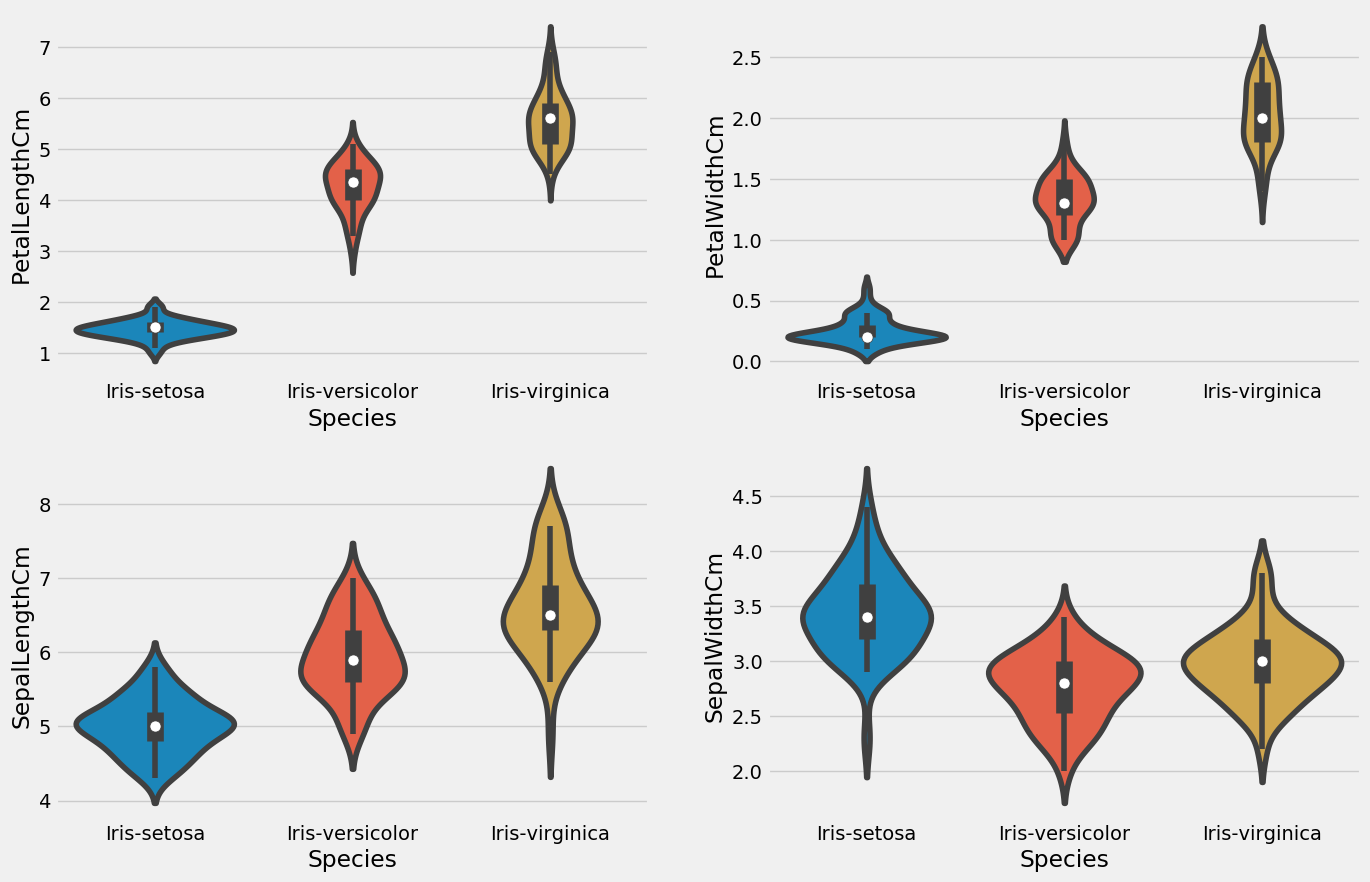

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [20]:
X=df.drop('Species',axis=1)
y=df['Species']

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [22]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [24]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 77ms/step - loss: 1.2845 - accuracy: 0.0000e+00 - val_loss: 1.2130 - val_accuracy: 0.1778
Epoch 2/45
4/4 [==============================] - 0s 12ms/step - loss: 1.1768 - accuracy: 0.3627 - val_loss: 1.1481 - val_accuracy: 0.4444
Epoch 3/45
4/4 [==============================] - 0s 11ms/step - loss: 1.1239 - accuracy: 0.3922 - val_loss: 1.1114 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0858 - accuracy: 0.3333 - val_loss: 1.0744 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0485 - accuracy: 0.3333 - val_loss: 1.0302 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 11ms/step - loss: 1.0053 - accuracy: 0.3333 - val_loss: 0.9892 - val_accuracy: 0.3333
Epoch 7/45
4/4 [==============================] - 0s 11ms/step - loss: 0.9642 - accuracy: 0.3333 - val_loss: 0.9415 - val_accuracy: 0.3333
Epoch 8/45
4/4 [=======

In [27]:
model.evaluate(X_test,y_test)


2/2 [==============================] - 0s 5ms/step - loss: 0.3828 - accuracy: 0.9778


[0.3827727138996124, 0.9777777791023254]

In [28]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 63ms/step
[[0.00997036 0.33521327 0.6548163 ]
 [0.00911914 0.34484145 0.6460395 ]
 [0.08853447 0.62106323 0.29040232]
 [0.0592363  0.57891995 0.36184373]
 [0.8983873  0.08646533 0.01514734]
 [0.05416754 0.6259931  0.31983942]
 [0.00824413 0.2528589  0.7388969 ]
 [0.00947838 0.2751095  0.71541214]
 [0.8978617  0.08763974 0.01449855]
 [0.02225941 0.40756628 0.5701743 ]]


In [29]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])


[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [30]:
history.history['accuracy']

[0.0,
 0.36274510622024536,
 0.3921568691730499,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.4117647111415863,
 0.7254902124404907,
 0.9607843160629272,
 0.9607843160629272,
 0.9215686321258545,
 0.7450980544090271,
 0.6764705777168274,
 0.6764705777168274,
 0.7450980544090271,
 0.8333333134651184,
 0.9019607901573181,
 0.9215686321258545,
 0.970588207244873,
 0.970588207244873,
 0.9313725233078003,
 0.9019607901573181,
 0.9509803652763367,
 0.9607843160629272,
 0.9607843160629272,
 0.9215686321258545,
 0.8725489974021912,
 0.843137264251709,
 0.9019607901573181,
 0.970588207244873,
 0.9607843160629272,
 0.9509803652763367,
 0.9607843160629272,
 0.970588207244873,
 0.9117646813392639,
 0.8823529481887817,
 0.9313725233078003,
 0.9607843160629272,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9607843160629272]

In [31]:
history.history['val_accuracy']

[0.17777778208255768,
 0.4444444477558136,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.6666666865348816,
 0.9111111164093018,
 0.9777777791023254,
 0.9111111164093018,
 0.7777777910232544,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7777777910232544,
 0.8222222328186035,
 0.8888888955116272,
 0.9111111164093018,
 0.9555555582046509,
 0.9111111164093018,
 0.8444444537162781,
 0.9111111164093018,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.9111111164093018,
 0.9777777791023254,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.8666666746139526,
 0.8222222328186035,
 0.8666666746139526,
 0.9333333373069763,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.9111111164093018,
 0.9333333373069763,
 0.9777777791023254,
 0.9777777791023254]

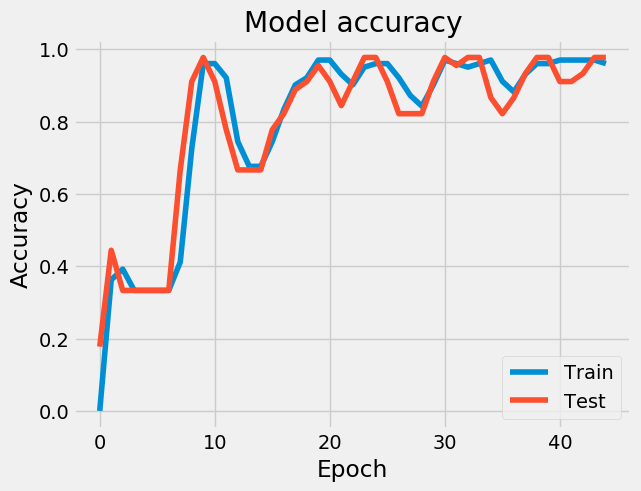

In [32]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()